In [5]:
import sys
sys.path.append(r'C:\Users\Lina\Documents\Lab-I---Dimensionality-Reduction\Unsupervised_model')

from SVD import SVD
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import r2_score

In [4]:
# Editar la imagen
my_img = cv2.imread('Imagen.jpeg')
my_img_gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_img_edited = cv2.resize(my_img_gray, (256, 256))
img = np.array(my_img_edited)
img.shape

(256, 256)

**Apply SVD over the picture of your face, progressively increasing the number of singular values used**

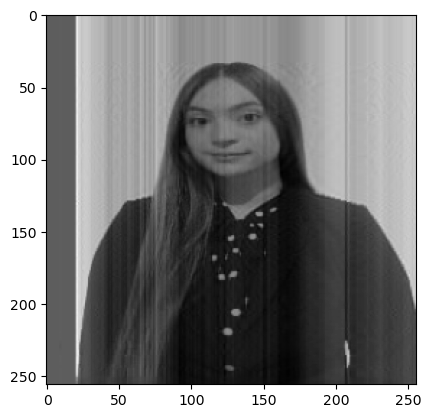

In [5]:
# fit the data
svd = SVD(n_components=50)
svd_fit = svd.fit(img)
svd_fit_transform = svd.fit_transform(img)
svd_inverse_transform = svd.inverse_transform(img)

plt.imshow(svd_inverse_transform,cmap="gray")

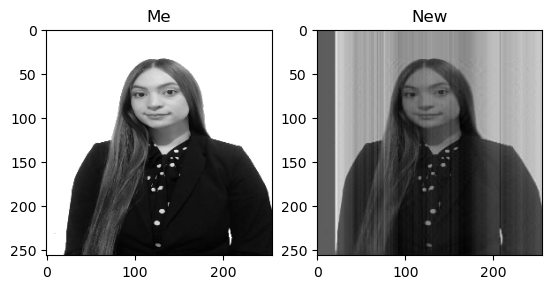

In [6]:
# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Me')
ax[1].imshow(svd_inverse_transform, cmap='gray')
ax[1].set_title('New')
plt.show()

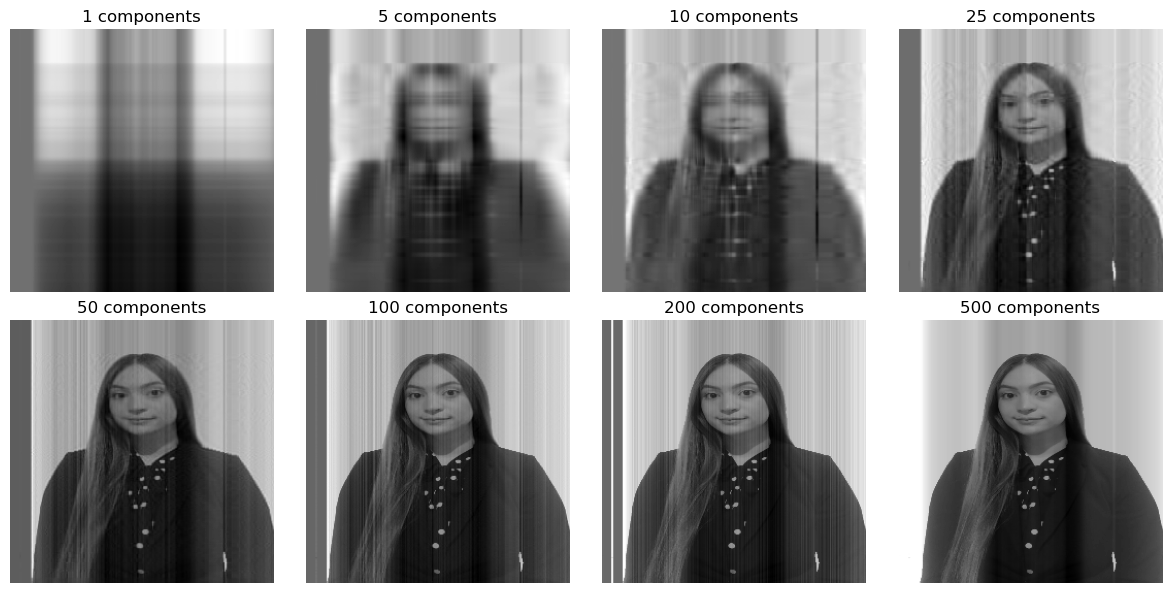

In [7]:
# Reconstruct the image using progressively more singular values
n_components = [1, 5, 10, 25, 50, 100, 200, 500]
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, n in enumerate(n_components):
    svd = SVD(n_components=n)
    svd_fit = svd.fit(img)
    svd_fit_transform = svd.fit_transform(img)
    svd_inverse_transform = svd.inverse_transform(img)
    axs[i//4][i%4].imshow(svd_inverse_transform, cmap="gray")
    axs[i//4][i%4].set_title(f"{n} components")
    axs[i//4][i%4].axis("off")
plt.tight_layout()
plt.show()

By inspecting the reconstructed images you can see that from the 25components it starts to look like a good approximation of the original image.

**How would you quantify how different your photo and the approximation are?**

To quantify how different is my photo and the approximation are, calculate the mean squared error (MSE) between the original and reconstructed images

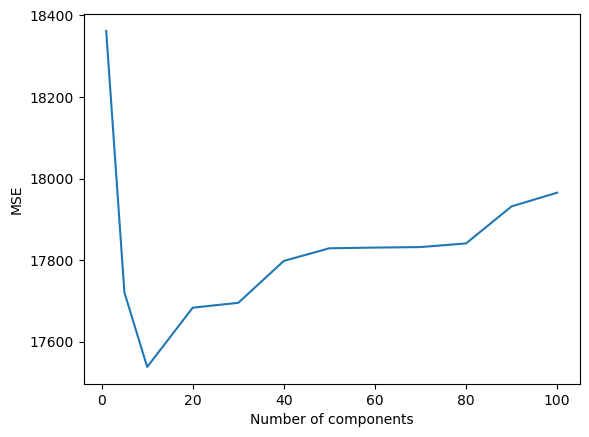

In [8]:
n_components = [1, 5, 10, 20, 30 , 40 , 50, 60, 70, 80, 90, 100]
values = []
for n in n_components:
    svd = SVD(n_components=n)
    svd_fit = svd.fit(img)
    svd_fit_transform = svd.fit_transform(img)
    svd_inverse_transform = svd.inverse_transform(img)
    mse = np.mean((img - svd_inverse_transform)**2)
    values.append(mse)

plt.plot(n_components, values)
plt.xlabel("Number of components")
plt.ylabel("MSE")
plt.show()

In this particular case, the reconstructed images have a particularly problematic behavior given that we have noisy data mainly in the areas on the sides of the image, which generates a very high MSE from the first components.
the least squared error is generated with 10 components, and from 30 the error begins to increase